In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas and Numpy have been used for Data Manipulation and numerical Calculations
# Matplotlib and Seaborn have been used for Data visualizations

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Importing Dataset required

In [ ]:
df = pd.read_csv("mpg.csv",  na_values='?')

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


# Understanding Data

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Data Types of the Data

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

All are numerical values except "name"

In [ ]:
df.shape

(398, 9)

## Checking for Duplicates

In [ ]:
duplicated_rows = df[df.duplicated()]

In [ ]:
duplicated_rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


There is no duplicate values.

## Checking for missing values

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

There are 6 missing values in horsepower (6 out of 398 rows is a very very less count - we can choose to remove the rows or apply any imputation techniques)

### Applying various Imputation techniques

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Define the imputation strategies
imputation_strategies = ['mean', 'median', 'constant', 'most_frequent', 'ffill', 'bfill', 'linear', 'knn', 'regression']

# Loop through each strategy
for strategy in imputation_strategies:
    # Create a new DataFrame with the 'horsepower' column
    df_hp = df[['horsepower']].copy()

    # Apply the imputation strategy
    if strategy == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif strategy == 'median':
        imputer = SimpleImputer(strategy='median')
    elif strategy == 'constant':
        imputer = SimpleImputer(strategy='constant', fill_value=0)
    elif strategy == 'most_frequent':
        imputer = SimpleImputer(strategy='most_frequent')
    elif strategy == 'ffill':
        df_hp.fillna(method='ffill', inplace=True)
    elif strategy == 'bfill':
        df_hp.fillna(method='bfill', inplace=True)
    elif strategy == 'linear':
        df_hp.interpolate(method='linear', inplace=True)

    # Print the DataFrame with imputed values
    print(f'Imputation strategy: {strategy}')
    print(df_hp.head())
    print()


Imputation strategy: mean
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: median
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: constant
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: most_frequent
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: ffill
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: bfill
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: linear
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: knn
   horsepower
0       130.0
1       165.0
2       150.0
3       150.0
4       140.0

Imputation strategy: regression
   horsepower
0       130.0
1       165.0
2       150.0
3     

### Dropping missing rows

In [ ]:
df = df.dropna(axis=0) ##removing rows - therefore axis=0

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

There are no missing values here

## Inferencing from Data

In [ ]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

The unique values are lesser in <strong>cylinders</strong> and <strong>origin</strong> columns. Therefore they can be considered as categorical values

## Dropping unwanted columns

In [ ]:
df.drop(columns=['name'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


## Finding correlation between features

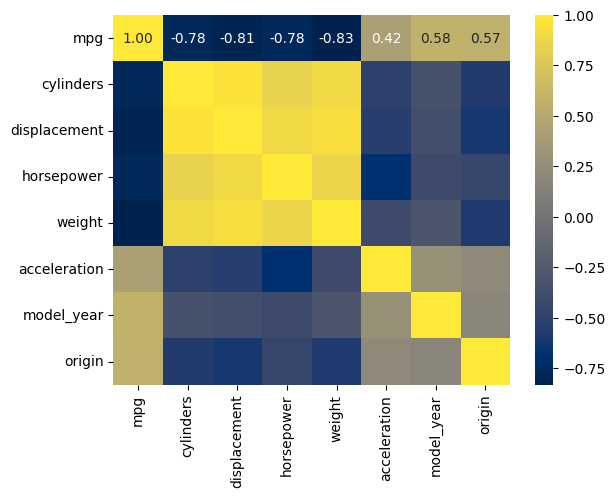

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f')

# Show the plot
plt.show()

In [ ]:
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


Here we have to find predict the MPG given other features. We can see that MPG depends the most to least on
1. model_year
2. origin
3. acceleration
4. cylinders
5. horsepower
6. displacement
7. weight